In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

Loading datasets

In [2]:
from sklearn.datasets import load_boston

bos = load_boston()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [3]:
df = pd.DataFrame(bos.data,columns=bos.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


getting target variable

In [4]:
df['MEDV'] = bos.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [7]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [15]:
q3 = df.CRIM.quantile(0.75)
q1 = df.CRIM.quantile(0.25)
iqr = q3 - q1
upper = q3 + (1.5*iqr)
lower = q1 - (1.5*iqr)
lower, upper

(-5.31051125, 9.06963875)

In [16]:
df.CRIM = df.CRIM.clip(-5.31051125, 9.06963875)

In [17]:
q3 = df.ZN.quantile(0.75)
q1 = df.ZN.quantile(0.25)
iqr = q3 - q1
upper = q3 + (1.5*iqr)
lower = q1 - (1.5*iqr)
lower, upper

(-18.75, 31.25)

In [18]:
df.ZN = df.ZN.clip(-18.75, 31.25)

In [19]:
q3 = df.INDUS.quantile(0.75)
q1 = df.INDUS.quantile(0.25)
iqr = q3 - q1
upper = q3 + (1.5*iqr)
lower = q1 - (1.5*iqr)
lower, upper

(-14.175, 37.465)

In [20]:
df.INDUS=df.INDUS.clip(-14.175, 37.465)

In [21]:
q3 = df.LSTAT.quantile(0.75)
q1 = df.LSTAT.quantile(0.25)
iqr = q3 - q1
upper = q3 + (1.5*iqr)
lower = q1 - (1.5*iqr)
lower, upper

(-8.057500000000005, 31.962500000000006)

In [22]:
df.LSTAT=df.LSTAT.clip(-8.057500000000005, 31.962500000000006)

In [23]:
q3 = df.MEDV.quantile(0.75)
q1 = df.MEDV.quantile(0.25)
iqr = q3 - q1
upper = q3 + (1.5*iqr)
lower = q1 - (1.5*iqr)
lower, upper

(5.0624999999999964, 36.962500000000006)

In [24]:
df.MEDV=df.MEDV.clip(5.0624999999999964, 36.962500000000006)

In [8]:
df=df.drop_duplicates()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


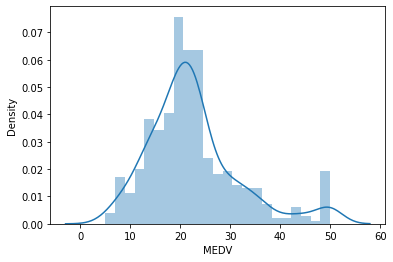

In [9]:
sns.distplot(df['MEDV'])

In [10]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


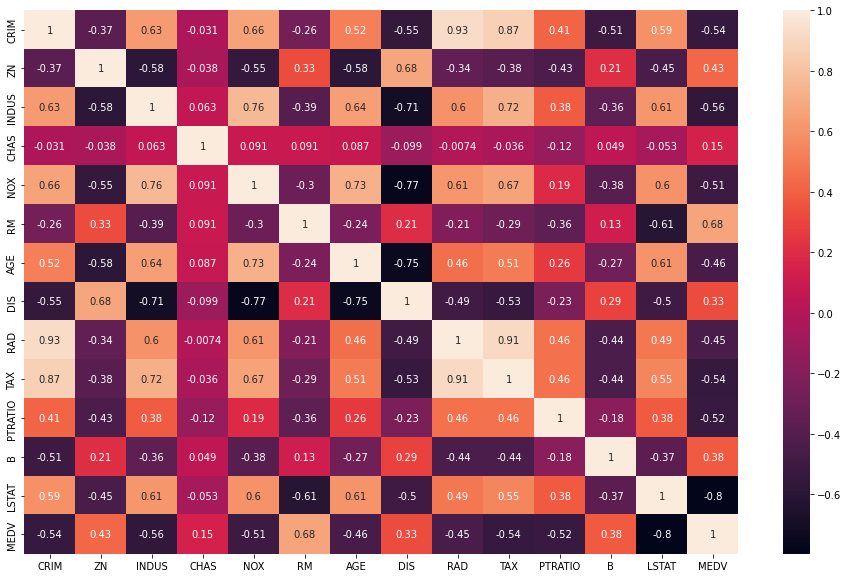

In [25]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(), annot=True)

CHAS have no correlation with MEDV, so we drop and we also drop CRIM

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn import metrics



Model

In [27]:
X = df[['ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]
y = df['MEDV']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state =80)


R2_score = pd.Series()
intercept = pd.Series()
df_coef = pd.DataFrame(index = ['ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'])
cross_val = pd.Series()

def model(x) :
    reg = x
    reg.fit(X_train, y_train)
    R2_score[x] =  reg.score(X_test, y_test)
    intercept[x] = reg.intercept_
    df_coef[x] = reg.coef_
    cross_val[x] = np.mean(cross_val_score(reg, X_train, y_train, cv = 10))
    

model(LinearRegression())
model(Ridge())
model(Lasso())    

<ipython-input-27-72b5deacaf38>:8: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  R2_score = pd.Series()
<ipython-input-27-72b5deacaf38>:9: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  intercept = pd.Series()
<ipython-input-27-72b5deacaf38>:11: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  cross_val = pd.Series()


In [28]:
R2_score

LinearRegression()    0.754177
Ridge()               0.748759
Lasso()               0.672950
dtype: float64

In [29]:
cross_val

LinearRegression()    0.746512
Ridge()               0.747144
Lasso()               0.695961
dtype: float64

In [30]:
intercept

LinearRegression()    36.502483
Ridge()               32.584266
Lasso()               39.885949
dtype: float64

In [31]:
df_coef

,LinearRegression(),Ridge(),Lasso()
ZN,0.044403,0.046042,0.044531
INDUS,0.009036,-0.016046,-0.000000
NOX,-12.313089,-6.645068,-0.000000
RM,2.397675,2.418424,0.000000
AGE,-0.000534,-0.005175,0.020367
DIS,-1.006570,-0.926759,-0.302433
RAD,0.185411,0.172562,0.142513
TAX,-0.010251,-0.010562,-0.011424
PTRATIO,-0.710094,-0.645273,-0.454808
B,0.009924,0.010247,0.008185


In [32]:
from sklearn.model_selection import train_test_split
X = df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]
y = df['MEDV']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 121)


R2_score = pd.Series()
intercept = pd.Series()
df_coef = pd.DataFrame(index = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'])
cross_val = pd.Series()

def model(x) :
    reg = x
    reg.fit(X_train, y_train)
    R2_score[x] =  reg.score(X_test, y_test)
    intercept[x] = reg.intercept_
    df_coef[x] = reg.coef_
    cross_val[x] = np.mean(cross_val_score(reg, X_train, y_train, cv = 10))
    
model(LinearRegression())
model(Ridge())
model(Lasso())

<ipython-input-32-18ec7688e8b7>:9: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  R2_score = pd.Series()
<ipython-input-32-18ec7688e8b7>:10: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  intercept = pd.Series()
<ipython-input-32-18ec7688e8b7>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  cross_val = pd.Series()


In [33]:
R2_score

LinearRegression()    0.657716
Ridge()               0.652282
Lasso()               0.645764
dtype: float64

In [34]:
cross_val

LinearRegression()    0.781710
Ridge()               0.780937
Lasso()               0.710623
dtype: float64

In [35]:
intercept

LinearRegression()    30.619468
Ridge()               26.986694
Lasso()               41.667704
dtype: float64

In [36]:
df_coef

,LinearRegression(),Ridge(),Lasso()
CRIM,-0.400547,-0.411353,-0.000000
ZN,0.026427,0.029199,0.030552
INDUS,-0.013678,-0.037475,-0.000000
CHAS,2.049008,1.899059,0.000000
NOX,-11.123658,-5.940469,-0.000000
RM,3.238482,3.269459,0.000000
AGE,-0.017626,-0.021647,0.010414
DIS,-1.036508,-0.963368,-0.274687
RAD,0.270197,0.262230,0.150956
TAX,-0.010245,-0.010625,-0.012199


Linear regression

In [37]:
from itertools import combinations

In [41]:
features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

combo_list = []
combo_r2_reg = []
combo_cv_reg = []

for i in range(1, len(features)+1) :
    combo = list(combinations(features, i))
    for j in combo :
        combo_list.append(j)

for i in combo_list :
    X = df.loc[:,i]
    y = df['MEDV']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 80)
    reg = LinearRegression()
    reg.fit(X_train, y_train)
    combo_r2_reg.append(reg.score(X_test, y_test))
    combo_cv_reg.append(np.mean(cross_val_score(reg, X_train, y_train, cv = 10)))
r2_reg = combo_r2_reg.index(max(combo_r2_reg))
cv_reg = combo_cv_reg.index(max(combo_cv_reg))

Ridge

In [59]:
features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

combo_list = []
combo_r2_rd = []
combo_cv_rd = []

for i in range(1, len(features)+1) :
    combo = list(combinations(features, i))
    for j in combo :
        combo_list.append(j)

for i in combo_list :
    X = df.loc[:,i]
    y = df['MEDV']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 80)
    rd = Ridge()
    rd.fit(X_train, y_train)
    combo_r2_rd.append(rd.score(X_test, y_test))
    combo_cv_rd.append(np.mean(cross_val_score(rd, X_train, y_train, cv = 10)))
r2_rd = combo_r2_rd.index(max(combo_r2_rd))
cv_rd = combo_cv_rd.index(max(combo_cv_rd))

lasso

In [61]:
features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

combo_list = []
combo_r2_ls = []
combo_cv_ls = []

for i in range(1, len(features)+1) :
    combo = list(combinations(features, i))
    for j in combo :
        combo_list.append(j)

for i in combo_list :
    X = df.loc[:,i]

    y = df['MEDV']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 80)
    ls = Lasso()
    ls.fit(X_train, y_train)
    combo_r2_ls.append(ls.score(X_test, y_test))
    combo_cv_ls.append(np.mean(cross_val_score(rd, X_train, y_train, cv = 10)))
r2_ls = combo_r2_ls.index(max(combo_r2_ls))
cv_ls= combo_cv_ls.index(max(combo_cv_ls))

In [62]:
print('Linear Regression')
print('R2 Score - ', combo_list[r2_reg],' : ',combo_r2_reg[r2_reg])
print('CV Score - ', combo_list[cv_reg],' : ',combo_cv_reg[cv_reg])

print('\n')

print('Ridge')
print('R2 Score - ', combo_list[r2_rd],' : ',combo_r2_rd[r2_rd])
print('CV Score - ', combo_list[cv_rd],' : ',combo_cv_rd[cv_rd])

print('\n')

print('Lasso')
print('R2 Score - ', combo_list[r2_ls],' : ',combo_r2_rd[r2_ls])
print('CV Score - ', combo_list[cv_ls],' : ',combo_cv_rd[cv_ls])

Linear Regression
R2 Score -  ('CRIM', 'INDUS', 'CHAS', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO')  :  0.7806921498111759
CV Score -  ('CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT')  :  0.7565007408866226


Ridge
R2 Score -  ('CRIM', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO')  :  0.7851073750559974
CV Score -  ('CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT')  :  0.7556863928680769


Lasso
R2 Score -  ('CRIM', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO')  :  0.7851073750559974
CV Score -  ('CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT')  :  0.7556863928680769
